In [1]:
%matplotlib notebook
import os
import sys
import cv2
import datetime
import numpy as np
import matplotlib as plt
from darkflow.net.build import TFNet
import track.sort.sort as srt
from track.eliminateoverlaps import *

In [2]:
# directory with images from video
#working_directory = '/home/analyticsuser/data/Husband Surprises Wife by Filling House With Puppies!'
# working_directory = '/home/analyticsuser/data/Nest Cam - Owner catches burglars in act on her phone'
# working_directory = '/data01/Detection/JPG'

# # only images
# files_in_directory = sorted([os.path.join(working_directory, file_name)
#                       for file_name in os.listdir(working_directory)
#                       if os.path.splitext(file_name)[1].lower() in ('.jpg', '.jpeg')])

# colors for different bboxes for visualization
colors = [(255,0,0), (0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(192,192,192),(128,128,128),
          (128,0,0),(128,128,0),(0,128,0),(128,0,128),(0,128,128),(0,0,128),(0,0,0)]

# configuration for YOLO
options = {'model': '/home/analyticsuser/darkflow/cfg/yolo.2.0.cfg', 
           'load': '/home/analyticsuser/darkflow/cfg/yolo.2.0.weights', 'threshold': 0.1}

# options = {'model': '/home/analyticsuser/darkflow/cfg/yolo-voc.2.0.cfg', 
#            'load': '/home/analyticsuser/darkflow/cfg/yolo-voc.2.0.weights', 'threshold': 0.1}

tfnet = TFNet(options)
tfnet.savepb()

# initialize SORT tracker:
# - 10 consecutive frames with no detection to terminate an existing track
# - 1 consecutive frame (i.e. after an initial frame) to activate the new track (before that will not produce any output)
# - 5 frames to extrapolate an active track (i.e. show predicted output eventhough no detection present for this track)
# - 0.8 unassigned detection over track bbox overlap (intersection over union) threshold to eliminate the detection
# - 0.94 unassigned detection over another stronger unassigned detection overlap (intersection over self bbox area) threshold to eliminate the detection
# - 0.8 unassigned detection over another stronger unassigned detection overlap (intersection over larger bbox area) threshold to eliminate the detection
# - 2.0 defines "stronger" detection disregarding the size -- if the score of the unassigned detection overlapping 
#       another unassigned detection is 2.0-times higher than the score of the other detection, it is stronger, otherwise 
#       larger size decides
#mot_tracker = srt.Sort(10,0,10,0.55,0.90,0.6,2.0)

Parsing ./cfg/yolo.2.0.cfg
Parsing /home/analyticsuser/darkflow/cfg/yolo.2.0.cfg
Loading /home/analyticsuser/darkflow/cfg/yolo.2.0.weights ...
Successfully identified 269862452 bytes
Finished in 0.05932450294494629s


In [11]:
tfnet.savepb()

In [ ]:
# detections_dir = '/data01/Detections'
# detections_dir_csv = '/data01/Detections/CSV'
# if not os.path.exists(detections_dir):
#     os.mkdir(detections_dir)
    
# # init a dataframe with raw detections
# detections_info_file = 'Detections_' + datetime.date.strftime(datetime.datetime.now(),'%Y-%m-%d %H-%M') + '.csv'
# with open(os.path.join(detections_dir_csv,  detections_info_file), 'w') as output:
#     output.write('Date,Timestamp,Filename,TopLeftX,TopLeftY,BottomRightX,BottomRightY,Confidence\n')

<IPython.core.display.Javascript object>


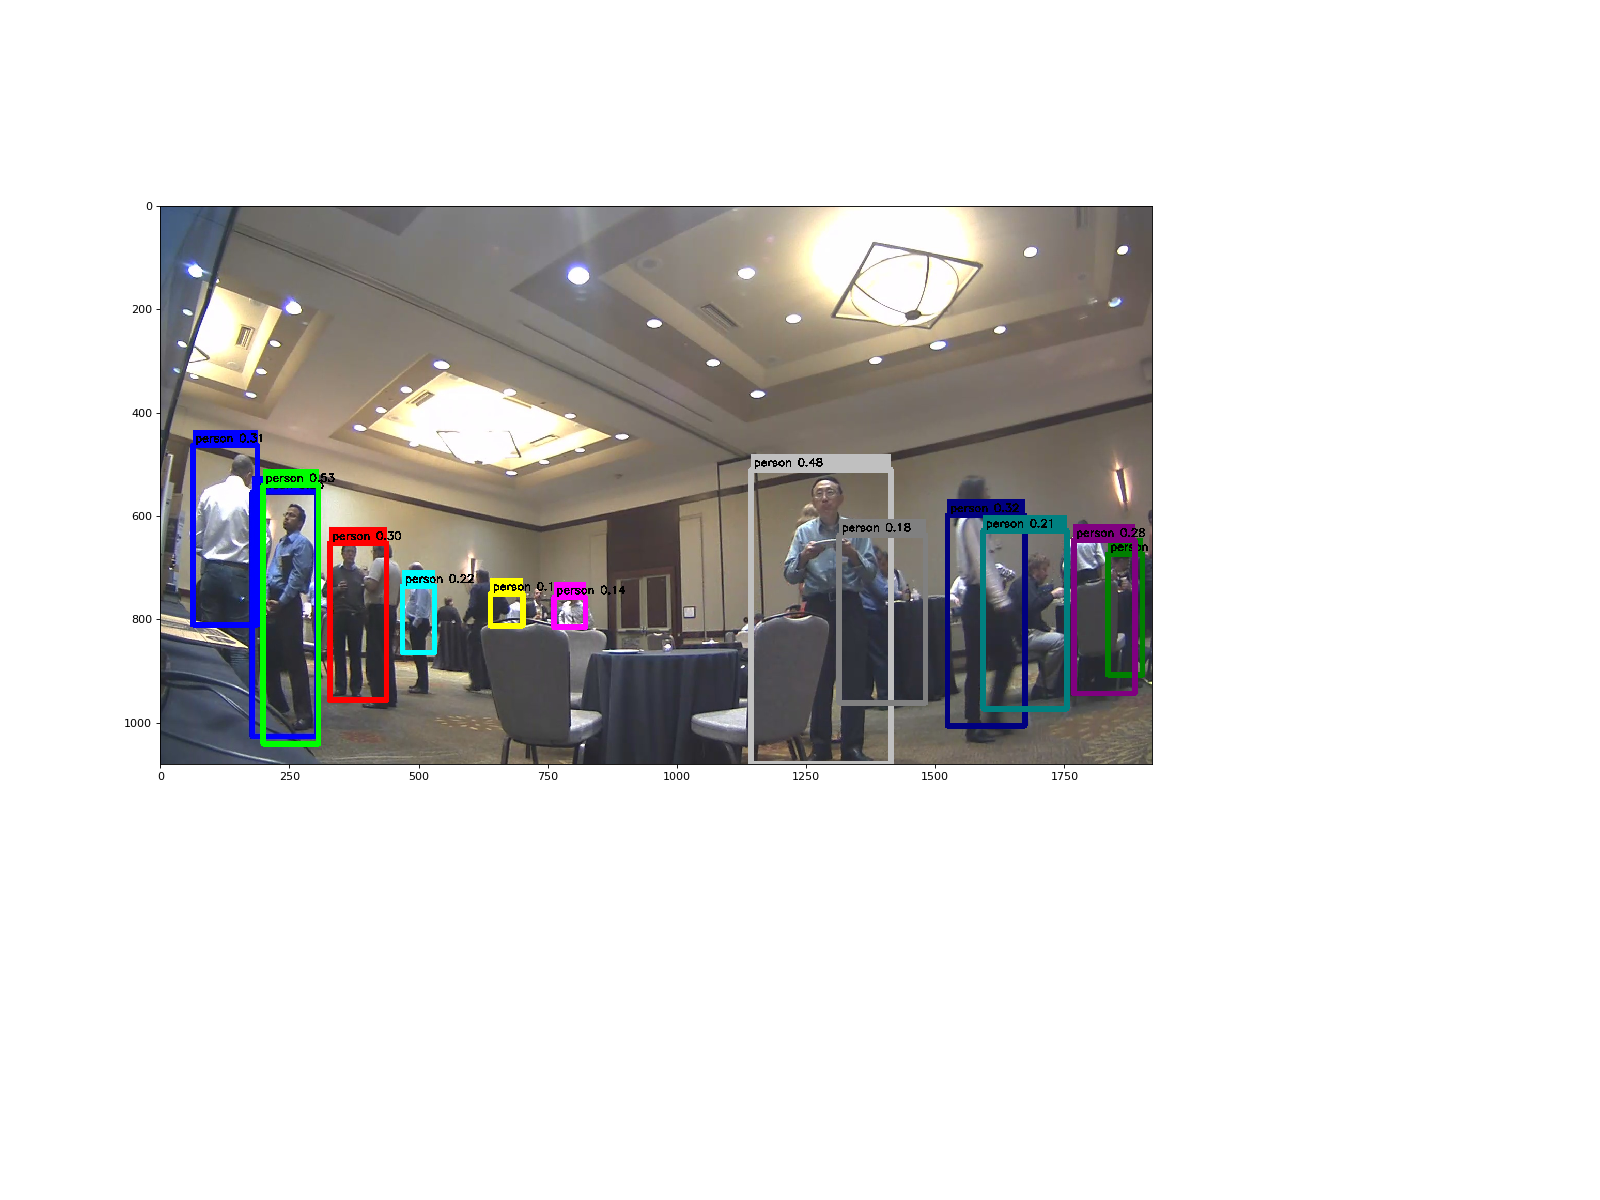

0

/home/analyticsuser/anaconda3/envs/jupyter/lib/python3.6/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


9

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


14

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


15

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


16

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


17

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


19

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


21

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


22

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


23

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


24

In [ ]:
plt.ion()

# init Camrea reader & matplotlib displaying
# cap = cv2.VideoCapture('/data01/Detection/JPG/2017-05-16 23-12-40.059.jpg')
# print(cap)
# ret, imgcv = cap.read()

imgcv = cv2.imread('/data01/Detections/JPG/2017-05-16 23-12-40.059.jpg')
imgcv_to_display = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
# pltimage = np.concatenate((imgcv_to_display, imgcv_to_display), axis=1)
fig=plt.figure(figsize=(16,12), dpi= 80, facecolor='w', edgecolor='k')
# detections_preview = plt.imshow(pltimage)
detections_preview = plt.imshow(imgcv)
try:
    plt.pause(0.05)
except Exception:
    pass

# displaying all
# allres = []
frmcnt=0
while(True):
    sys.stdout.write("\r" + str(frmcnt))
    sys.stdout.flush()
    frmcnt+=1
    
    #ret, imgcv = cap.read()
    imgcv = cv2.imread('/data01/Detections/JPG/2017-05-16 23-12-40.059.jpg')
    if type(imgcv) == type(None):
        print("!!! Couldn't read frame!")
        break    

    img1 = imgcv.copy()
    result = tfnet.return_predict(imgcv)
#     for idx, detection in enumerate(result):
#         if detection['label'] == 'person':
# #         if detection['label'] == 'person' or detection['label'] == 'dog' or detection['label'] == 'cat':
#             cv2.rectangle(imgcv, (detection['topleft']['x'], detection['topleft']['y']), 
#                           (detection['bottomright']['x'], detection['bottomright']['y']), 
#                           colors[idx % len(colors)], 10)

#             cv2.rectangle(imgcv, (detection['topleft']['x'], detection['topleft']['y'] - 20), 
#                           (detection['bottomright']['x'], detection['topleft']['y']), (125, 125, 125), -1)

#             cv2.putText(imgcv, detection['label'] + ' : %.2f' % detection['confidence'], 
#                         (detection['topleft']['x'] + 5, detection['topleft']['y'] - 7), 
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
            
       
    
    # continue with tracking
    # print('result: ', result) 
#     fres = list(filter(lambda x: x['label'] == 'person' or x['label'] == 'dog' or x['label'] == 'cat',result))
    fres = list(filter(lambda x: x['label'] == 'person',result))
    dets0 = list(map( lambda x: [float(x['topleft']['x']),float(x['topleft']['y']),
                                 float(x['bottomright']['x']),float(x['bottomright']['y']),
                                 x['confidence'],x['label']], fres))
    if len(dets0):
        current_time = datetime.datetime.now()
        #file_name = str(current_time) + '.jpg'
        file_name = datetime.date.strftime(current_time, '%Y-%m-%d %H-%M-%S.%f')[:-3] + '.jpg'
        #cv2.imwrite(os.path.join(detections_dir, file_name), img1)
        
    # eliminate overlaps
    eldets=eliminate1(dets0,0.80,0.6,2.0)
    for idx, bbo_f in enumerate(eldets):
        # print('bbo_f: ', bbo_f )
        bbo = list(map(lambda x: int(round(float(x))), bbo_f[0:4]))
        obsc = bbo_f[4]
        label = bbo_f[5]
        cv2.rectangle(img1, (bbo[0], bbo[1]), (bbo[2], bbo[3]), colors[idx%len(colors)], 10)
        cv2.rectangle(img1, (bbo[0], bbo[1]-30), (bbo[2], bbo[1]), colors[idx%len(colors)], -1)
        cv2.putText(img1, label+' %0.2f'%obsc, (bbo[0]+5, bbo[1]-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)
        
#         print(len(bbo))
#         with open(os.path.join(detections_dir_csv, detections_info_file), 'a') as output_file:
# #             'Date,Timestamp,ID,Filename,TopLeftX,TopLeftY,BottomRightX,BottomRightY,Confidence\n'
#             output_file.write(f"{datetime.date.strftime(current_time,'%Y-%m-%d')},"
#                               f"{'2000-01-01 ' + datetime.date.strftime(current_time, '%H:%M:%S.%f')[:-3]},"
#                               f"{file_name},{bbo[0]},{bbo[1]},{bbo[2]},{bbo[3]},{obsc}\n")
    
    # print('dets0: ', dets0) 
    # allres += [','.join(list(map(lambda x: str(x),dets0)))]   # save the results
#     dets = np.asarray( dets0 )
#     objs,termtracks = mot_tracker.update(dets)
    # print('objs: ', objs) 
#     for bbo_f in objs:
#         # print('bbo_f: ', bbo_f )
#         bbo = list(map(lambda x: int(round(float(x))), bbo_f[0:4]))
#         obid = int(bbo_f[5])
#         obsc = bbo_f[4]
#         cv2.rectangle(img1, (bbo[0], bbo[1]), (bbo[2], bbo[3]), colors[obid%len(colors)], 10)
#         cv2.rectangle(img1, (bbo[0], bbo[1]-40), (bbo[2], bbo[1]), (125, 125, 125), -1)
#         cv2.putText(img1, 'id=%03d'%obid + ' @%0.2f'%obsc, (bbo[0]+5, bbo[1]-7), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

#     if len(dets0):
#         cv2.imwrite(os.path.join(detections_dir, 'JPG', file_name), img1) # save image with detections
    
    imgcv_to_display = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
    
    imgcv_to_display2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
            
#     pltimage = np.concatenate((imgcv_to_display, imgcv_to_display2), axis=1)
#     detections_preview.set_data(pltimage)
    detections_preview.set_data(imgcv_to_display2)

#     plt.draw()
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
#         plt.pause(0.0002)
    except Exception:
        pass

#content = '\n'.join(allres)
#with open('yolodet.txt', 'w') as fro:
#    fro.write(content)
